In [43]:
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
import seaborn as sns
#nltk.download('punkt')

In [ ]:
DATASET_PATH = 'spam.csv'
df = pd.read_csv(DATASET_PATH)
messages = df['Message'].values.tolist()
labels = df['Category'].values.tolist()

In [29]:
def lowercase(text):
    return text.lower()
def punctuation_removal(text):
    #translator = {k: '' for k in list(string.punctuation)}
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator)
def tokenize(text):
    return word_tokenize(text)
def remove_stopwords(tokens):
    stop_words = stopwords.words('english')
    return [token for token in tokens if token not in stop_words]
def stemming(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]
def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    stem = stemming(tokens)
    return stem
messages = [preprocess_text(message) for message in messages]
#messages

In [30]:
def create_dictionary(messages):
    dictionary = []
    for tokens in messages:
        if tokens not in dictionary:
            dictionary.append(tokens)
    return dictionary
dictionary = create_dictionary(messages)
#dictionary

In [33]:
def create_features(tokens, dictionary):
    features = np.zeros(len(dictionary))
    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1
    return features
X = np.array([create_features(tokens,dictionary) for tokens in messages])

In [32]:
le = LabelEncoder()
y = le.fit_transform(labels)
print(f"Classes: {le.classes_}")
print(f"Encoded labels: {y}")

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


In [35]:
VAL_SIZE = 0.2
TEST_SIZE = 0.125
SEED = 0
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = VAL_SIZE, shuffle = True, random_state=SEED)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = TEST_SIZE, shuffle = True, random_state= SEED)

In [37]:
model = GaussianNB()
print("Start training...")
model = model.fit(X_train,y_train)
print("Training completed!")

Start training...
Training completed!


In [40]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val_f1_scores = f1_score(y_val, y_val_pred)
test_f1_scores = f1_score(y_test, y_test_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

C:\Program Files\Python312\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Program Files\Python312\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Program Files\Python312\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Program Files\Python312\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


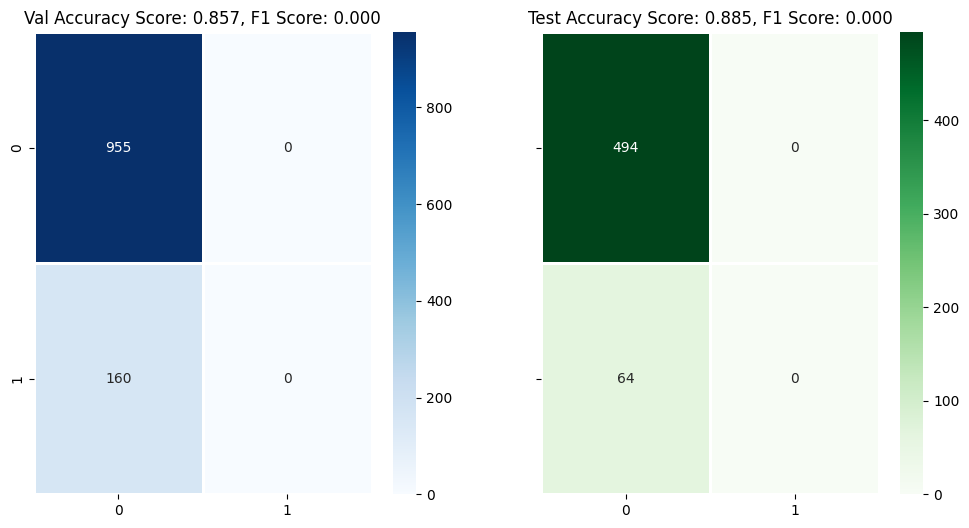

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Naive Bayes')

sns.heatmap(val_cm,ax=axes[0], annot = True,linewidths=1, fmt='d', cmap='Blues')
val_title = f'Val Accuracy Score: {val_accuracy:.3f}, F1 Score: {val_f1_scores:.3f}'
axes[0].set_title(val_title)

sns.heatmap(test_cm,ax=axes[1], annot = True,linewidths=1, fmt='d', cmap='Greens')
test_title = f'Test Accuracy Score: {test_accuracy:.3f}, F1 Score: {test_f1_scores:.3f}'
axes[1].set_title(test_title)

plt.show()

In [46]:
def predict(text, model, dictionary, label_encoder):
    processed_text = preprocess_text(text)
    features = create_features(processed_text, dictionary)
    features= np.array(features).reshape(1,-1)
    prediction = model.predict(features)
    prediction_cls = label_encoder.inverse_transform(prediction)[0]
    return prediction_cls

In [55]:
test_input = "I am actually thinking a way of doing something useful"
prediction_cls = predict(test_input,model,dictionary,le)
print(f"Prediction: {prediction_cls}")

Prediction: ham


C:\Program Files\Python312\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Program Files\Python312\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
